<a href="https://colab.research.google.com/github/Mharis55/Data_Analytics_Bootcamp_2024/blob/main/regression_vs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/Stores.csv')

In [ ]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [ ]:
df.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [ ]:
def good_cust(a):
    a = (a > 300).astype(int)
    return a

In [ ]:
a = df['Daily_Customer_Count']
a

0       530
1       210
2       720
3       620
4       450
       ... 
891    1080
892     850
893    1060
894     770
895    1110
Name: Daily_Customer_Count, Length: 896, dtype: int64

In [ ]:
good_cust(a)

0      1
1      0
2      1
3      1
4      1
      ..
891    1
892    1
893    1
894    1
895    1
Name: Daily_Customer_Count, Length: 896, dtype: int64

In [ ]:
df['good_customer_amount'] = good_cust(a)

In [ ]:
df

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,good_customer_amount
0,1,1659,1961,530,66490,1
1,2,1461,1752,210,39820,0
2,3,1340,1609,720,54010,1
3,4,1451,1748,620,53730,1
4,5,1770,2111,450,46620,1
...,...,...,...,...,...,...
891,892,1582,1910,1080,66390,1
892,893,1387,1663,850,82080,1
893,894,1200,1436,1060,76440,1
894,895,1299,1560,770,96610,1


<Axes: xlabel='Store_Area'>

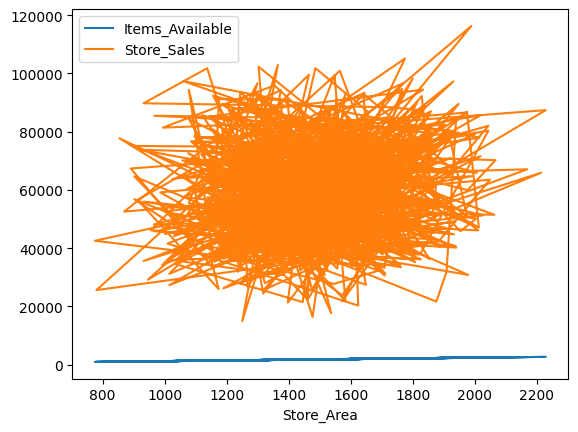

In [ ]:
df.plot.line('Store_Area', ['Items_Available', 'Store_Sales'])



In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report


#Regression

In [ ]:
y = df['Store_Sales'] # Traget
x = df.drop('Store_Sales', axis=1) #dependent

In [ ]:
tx,tex,ty,tey = train_test_split(x,y,test_size=0.5,random_state=42)

In [ ]:
Model_R = LinearRegression()

In [ ]:
Model_R.fit(tx,ty)

LinearRegression()

In [ ]:
y_pred = Model_R.predict(tex)

In [ ]:
r2_score(tey,y_pred)

0.011566292090706143

#Classifiaction

In [ ]:
y = df['good_customer_amount'] # Traget
x = df.drop('good_customer_amount', axis=1) #dependent

In [ ]:
tx,tex,ty,tey = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:

Model_LR = LogisticRegression(random_state=123)

In [ ]:
Model_LR.fit(tx,ty)

LogisticRegression(random_state=123)

In [ ]:
y_pred = Model_LR.predict(tex)

In [ ]:
accuracy_score(tey,y_pred)

0.9888475836431226

In [ ]:
print(classification_report(tey, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.99      1.00      0.99       261

    accuracy                           0.99       269
   macro avg       0.99      0.81      0.88       269
weighted avg       0.99      0.99      0.99       269

